In [80]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
from datetime import datetime as dt
pd.set_option('display.max_columns', 500)
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

In [81]:
train = pd.read_csv('train.csv')

In [82]:
sample_sub=pd.read_csv("Sample_sub.csv")
sample_sub.head()

,ID,Capture_Number
0,CaptureSite_0_201901,7
1,CaptureSite_0_201902,1
2,CaptureSite_0_201903,5
3,CaptureSite_0_201904,2
4,CaptureSite_0_201905,3


In [83]:
categ = pd.read_csv('CaptureSite_category.csv')
categ

,CaptureSite,CaptureSiteCategory,Type
0,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,CaptureSite_12,CaptureSiteCategory_2,Type_1
5,CaptureSite_13,CaptureSiteCategory_2,Type_1
6,CaptureSite_14,CaptureSiteCategory_4,Type_0
7,CaptureSite_15,CaptureSiteCategory_0,Type_0
8,CaptureSite_16,CaptureSiteCategory_4,Type_0
9,CaptureSite_17,CaptureSiteCategory_4,Type_0


In [84]:
print(categ.shape,train.shape)

(29, 3) (18062, 21)


In [85]:
df = pd.merge(categ, train, on='CaptureSite')
df.head()

,CaptureSite,CaptureSiteCategory,Type,Rescue_ID,Date_TimeCaught,Researcher,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,Tag_2,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2000_RE_0060,2000-12-22,Researcher_25,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,None,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0187,2001-10-28,Researcher_6,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,None,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0197,2001-11-01,Researcher_6,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,None,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0031,2002-03-11,Researcher_32,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,None,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0118,2002-08-08,Researcher_25,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,None,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [86]:
df.head()

,CaptureSite,CaptureSiteCategory,Type,Rescue_ID,Date_TimeCaught,Researcher,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,Tag_2,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2000_RE_0060,2000-12-22,Researcher_25,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,None,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0187,2001-10-28,Researcher_6,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,None,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0197,2001-11-01,Researcher_6,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,None,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0031,2002-03-11,Researcher_32,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,None,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0118,2002-08-08,Researcher_25,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,None,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [87]:
df['ForagingGround'].value_counts()

Creek    11408
Ocean     6651
creek        3
Name: ForagingGround, dtype: int64

In [88]:
df.loc[df['ForagingGround']=='creek', 'ForagingGround']='Creek'

In [89]:
df['TurtleCharacteristics'].nunique()

16343

In [90]:
df.dtypes

CaptureSite               object
CaptureSiteCategory       object
Type                      object
Rescue_ID                 object
Date_TimeCaught           object
Researcher                object
ForagingGround            object
CaptureMethod             object
Fisher                    object
LandingSite               object
Species                   object
Tag_1                     object
Tag_2                     object
Lost_Tags                 object
T_Number                  object
CCL_cm                   float64
CCW_cm                   float64
Weight_Kg                float64
Sex                       object
TurtleCharacteristics     object
Status                    object
ReleaseSite               object
Date_TimeRelease          object
dtype: object

In [91]:
df['Date_TimeCaught'] = pd.to_datetime(df['Date_TimeCaught'], format='%Y-%m-%d')

In [92]:
df['month_caught'] = df['Date_TimeCaught'].dt.month

In [93]:
df['year_caught'] = df['Date_TimeCaught'].dt.year

In [94]:
df['week_of_year_caught'] = df['Date_TimeCaught'].dt.week

C:\Users\kirk\AppData\Local\Temp/ipykernel_1564/3865848895.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week_of_year_caught'] = df['Date_TimeCaught'].dt.week


In [95]:
df['day_caught'] = df['Date_TimeCaught'].dt.day

In [96]:
df['day_of_week_caught'] = pd.DatetimeIndex(df['Date_TimeCaught']).dayofweek

In [97]:
df["year_woy"]=df.year_caught*100+df.week_of_year_caught

In [98]:
df['day_of_year']= pd.DatetimeIndex(df['Date_TimeCaught']).dayofyear

In [99]:
df.head()

,CaptureSite,CaptureSiteCategory,Type,Rescue_ID,Date_TimeCaught,Researcher,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,Tag_2,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,month_caught,year_caught,week_of_year_caught,day_caught,day_of_week_caught,year_woy,day_of_year
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2000_RE_0060,2000-12-22,Researcher_25,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,None,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,12,2000,51,22,4,200051,357
1,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0187,2001-10-28,Researcher_6,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,None,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,10,2001,43,28,6,200143,301
2,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0197,2001-11-01,Researcher_6,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,None,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01,11,2001,44,1,3,200144,305
3,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0031,2002-03-11,Researcher_32,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,None,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,3,2002,11,11,0,200211,70
4,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0118,2002-08-08,Researcher_25,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,None,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,8,2002,32,8,3,200232,220


In [100]:
df.shape

(18062, 30)

In [101]:
df.reset_index(drop=True, inplace=True)

In [102]:
df.isnull().sum().sort_values(ascending=False)

T_Number                 18024
Lost_Tags                17137
Date_TimeRelease          6108
Weight_Kg                 5409
Sex                       4330
Status                    3633
ReleaseSite                 75
TurtleCharacteristics       41
CCW_cm                      27
CCL_cm                      24
year_woy                     0
day_of_week_caught           0
day_caught                   0
week_of_year_caught          0
year_caught                  0
month_caught                 0
CaptureSite                  0
CaptureSiteCategory          0
Tag_2                        0
Tag_1                        0
Species                      0
LandingSite                  0
Fisher                       0
CaptureMethod                0
ForagingGround               0
Researcher                   0
Date_TimeCaught              0
Rescue_ID                    0
Type                         0
day_of_year                  0
dtype: int64

In [103]:
del df['T_Number']
del df['Lost_Tags']

In [104]:
# df['Weight_Kg'].unique().tolist()
# df['Weight_Kg'].min()
# df['Weight_Kg'].max()

# taking the median value becuase it outlier-resistant
df['Weight_Kg'].fillna((df['Weight_Kg'].median()), inplace=True)

In [105]:
df.groupby(by = df['CaptureSite']).mean()

,CCL_cm,CCW_cm,Weight_Kg,month_caught,year_caught,week_of_year_caught,day_caught,day_of_week_caught,year_woy,day_of_year
CaptureSite,,,,,,,,,,
CaptureSite_0,41.603053,39.556211,9.084105,7.421053,2011.726316,30.631579,15.494737,2.347368,201203.263158,210.284211
CaptureSite_1,42.042727,39.039053,8.446293,6.866330,2012.865069,27.890290,16.432535,2.986129,201314.397226,194.424968
CaptureSite_10,39.727257,37.095508,8.527953,6.409483,2012.810345,25.864224,15.178879,2.920259,201306.898707,179.215517
CaptureSite_11,42.722315,40.200613,8.515929,6.852564,2008.923077,28.304487,16.189103,3.044872,200920.612179,193.717949
CaptureSite_12,40.437958,38.232815,7.596684,7.237347,2010.000000,29.863874,16.141361,2.958115,201029.863874,205.207679
CaptureSite_13,39.085744,37.099890,7.368989,7.705238,2012.683313,31.657734,15.216809,2.897686,201299.989038,218.543240
CaptureSite_14,42.349336,39.915403,8.414882,6.753555,2011.279621,27.682464,16.284360,3.270142,201155.644550,190.677725
CaptureSite_15,37.628579,34.814829,6.866037,6.849446,2014.232125,27.890735,15.941088,3.008560,201451.103223,193.311682
CaptureSite_16,43.539602,40.841665,9.083041,7.245559,2011.034483,29.842215,15.812957,2.909091,201133.290491,205.160920


In [106]:
# a better approach than filling null values with the whole dataset's median would be to fill 
# in null values with each capture site's median value
df['CCL_cm'] = df['CCL_cm'].fillna(df.groupby(['CaptureSite'])['CCL_cm'].transform('median'))
df['CCW_cm'] = df['CCW_cm'].fillna(df.groupby(['CaptureSite'])['CCW_cm'].transform('median'))

In [107]:
# For null Date_TimeRelease values we can count the probability of Date_TimeRelease==Date_TimeCaught and if it is
# a very high value we can fill those nulll values with Date_TimeCaught
df[['Date_TimeRelease', 'Date_TimeCaught']]

,Date_TimeRelease,Date_TimeCaught
0,22/12/00,2000-12-22
1,28/10/01,2001-10-28
2,01/11/01,2001-11-01
3,11/03/02,2002-03-11
4,08/08/02,2002-08-08
...,...,...
18057,18/12/18,2018-12-18
18058,18/12/18,2018-12-18
18059,24/12/18,2018-12-24
18060,24/12/18,2018-12-24


In [108]:
df['Sex'].value_counts()

Unknown         13578
Female            113
Male               39
Not_Recorded        2
Name: Sex, dtype: int64

In [109]:
df['Sex'].fillna('Unknown', inplace=True)

In [110]:
df.loc[df['Sex']=='Not_Recorded', 'Sex']='Unknown'

In [111]:
df['Status'].value_counts()

Released                                          13610
Admitted                                            292
Not_Recorded                                         28
 shell is beginning to flake                          7
 green algae on carapace                              7
                                                  ...  
 barnacles on plastron (removed)                      1
 notches on RMS                                       1
 small barnacles around neck and rear flippers        1
 5 RLS                                                1
 barnacles on plastron                                1
Name: Status, Length: 439, dtype: int64

In [112]:
df['Status'].fillna('Not_Recorded', inplace=True)

In [113]:
df['ReleaseSite'].value_counts()

ReleaseSite_62                                                                                              9951
ReleaseSite_11                                                                                              2091
ReleaseSite_18                                                                                              1603
ReleaseSite_68                                                                                              1596
ReleaseSite_50                                                                                               566
                                                                                                            ... 
 notch in 11th RMS                                                                                             1
ReleaseSite_53                                                                                                 1
 numerous barnacles on neck and shoulders. Patches of pinkish calcareous and green algae on the 

In [114]:
df['ReleaseSite'].fillna('Unknown', inplace=True)

In [115]:
df['TurtleCharacteristics'].fillna('Unknown', inplace=True)

In [116]:
df.head()

,CaptureSite,CaptureSiteCategory,Type,Rescue_ID,Date_TimeCaught,Researcher,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,Tag_2,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,month_caught,year_caught,week_of_year_caught,day_caught,day_of_week_caught,year_woy,day_of_year
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2000_RE_0060,2000-12-22,Researcher_25,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,None,64.70,62.60,7.5,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,12,2000,51,22,4,200051,357
1,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0187,2001-10-28,Researcher_6,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,None,35.85,31.35,7.5,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,10,2001,43,28,6,200143,301
2,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0197,2001-11-01,Researcher_6,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,None,51.80,49.20,7.5,Unknown,clean,Released,ReleaseSite_50,01/11/01,11,2001,44,1,3,200144,305
3,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0031,2002-03-11,Researcher_32,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,None,60.50,59.00,7.5,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,3,2002,11,11,0,200211,70
4,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0118,2002-08-08,Researcher_25,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,None,34.70,33.00,7.5,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,8,2002,32,8,3,200232,220


In [117]:
# split Id to Year woy and CaptureSite
sample_sub["year_woy"]=(sample_sub.ID.apply(lambda x: x.split("_")[-1])).astype(int)
sample_sub["CaptureSite"]=sample_sub.ID.apply(lambda x: ("_").join(x.split("_")[0:-1]))

In [118]:
# Create Time features from Date_TimeCaught 
train["Date_TimeCaught"]=pd.to_datetime(train["Date_TimeCaught"])
print(train.Date_TimeCaught.min(),train.Date_TimeCaught.max())
train["year"]=train.Date_TimeCaught.dt.year
train["week_of_year"]=train.Date_TimeCaught.dt.weekofyear
train["year_woy"]=train.year*100+train.week_of_year

1998-04-17 00:00:00 2018-12-31 00:00:00


C:\Users\kirk\AppData\Local\Temp/ipykernel_1564/2290698883.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train["week_of_year"]=train.Date_TimeCaught.dt.weekofyear


In [119]:
keys=pd.concat([train[["year_woy","CaptureSite"]],sample_sub[["year_woy","CaptureSite"]]])
# keys.sort_values(["CaptureSite","year_woy"],inplace=True)
CaptureSite_min_year_woy=keys.groupby("CaptureSite").year_woy.min().rename("year_woy").reset_index()
CaptureSite_min_year_woy.head()

,CaptureSite,year_woy
0,CaptureSite_0,200051
1,CaptureSite_1,200123
2,CaptureSite_10,200050
3,CaptureSite_11,199828
4,CaptureSite_12,200107


In [120]:
range_year_woy=pd.DataFrame()
range_year_woy["Date_TimeCaught"]=pd.date_range(start=train.Date_TimeCaught.min(),end=dt(2019,10,31))

In [121]:
range_year_woy["year"]=range_year_woy.Date_TimeCaught.dt.year
range_year_woy["week_of_year"]=range_year_woy.Date_TimeCaught.dt.weekofyear
range_year_woy["year_woy"]=range_year_woy.year*100+range_year_woy.week_of_year
range_year_woy.drop_duplicates(["year_woy"],inplace=True)
range_year_woy

C:\Users\kirk\AppData\Local\Temp/ipykernel_1564/1570017709.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  range_year_woy["week_of_year"]=range_year_woy.Date_TimeCaught.dt.weekofyear


,Date_TimeCaught,year,week_of_year,year_woy
0,1998-04-17,1998,16,199816
3,1998-04-20,1998,17,199817
10,1998-04-27,1998,18,199818
17,1998-05-04,1998,19,199819
24,1998-05-11,1998,20,199820
...,...,...,...,...
7836,2019-09-30,2019,40,201940
7843,2019-10-07,2019,41,201941
7850,2019-10-14,2019,42,201942
7857,2019-10-21,2019,43,201943


In [122]:
final_data=[]
for site , year_woy in zip(CaptureSite_min_year_woy.CaptureSite.values,CaptureSite_min_year_woy.year_woy.values) :

    one_site_df=range_year_woy[range_year_woy.year_woy>=year_woy]
    one_site_df["CaptureSite"]=site
    final_data.append(one_site_df)
final_data=pd.concat(final_data)
len(final_data)

C:\Users\kirk\AppData\Local\Temp/ipykernel_1564/558864668.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_site_df["CaptureSite"]=site


28048

In [123]:
Target=train.groupby(["year_woy","CaptureSite"]).CaptureSite.count().rename("Capture_Number").reset_index()
final_data=final_data.merge(Target,on=["year_woy","CaptureSite"],how="left")

In [124]:
final_data.Capture_Number.fillna(0,inplace=True)

In [125]:
final_data[(final_data.year==2008)|(final_data.year==2009)].head()

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
368,2008-01-01,2008,1,200801,CaptureSite_0,0.0
369,2008-01-07,2008,2,200802,CaptureSite_0,0.0
370,2008-01-14,2008,3,200803,CaptureSite_0,0.0
371,2008-01-21,2008,4,200804,CaptureSite_0,1.0
372,2008-01-28,2008,5,200805,CaptureSite_0,0.0


In [126]:
final_data.drop(final_data[(final_data.year==2008)|(final_data.year==2009)].index, inplace=True)

In [127]:
train=final_data[final_data.year<2019]
test=final_data[final_data.year==2019]

In [128]:
test.shape

(1276, 6)

In [129]:
train.to_csv("final_data.csv",index=False)
test.to_csv("submission_data.csv",index=False)

In [130]:
del train
del test
del final_data
del Target

In [131]:
df_date = pd.read_csv('final_data.csv')
df_date.head()

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
0,2000-01-01,2000,52,200052,CaptureSite_0,0.0
1,2000-12-18,2000,51,200051,CaptureSite_0,1.0
2,2001-01-01,2001,1,200101,CaptureSite_0,0.0
3,2001-01-08,2001,2,200102,CaptureSite_0,0.0
4,2001-01-15,2001,3,200103,CaptureSite_0,0.0


In [132]:
df_sub = pd.read_csv('submission_data.csv')
df_sub.head()

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
0,2019-01-01,2019,1,201901,CaptureSite_0,0.0
1,2019-01-07,2019,2,201902,CaptureSite_0,0.0
2,2019-01-14,2019,3,201903,CaptureSite_0,0.0
3,2019-01-21,2019,4,201904,CaptureSite_0,0.0
4,2019-01-28,2019,5,201905,CaptureSite_0,0.0


In [133]:
df_date['Date_TimeCaught'] = pd.to_datetime(df_date['Date_TimeCaught'], format='%Y-%m-%d')
df_sub['Date_TimeCaught'] = pd.to_datetime(df_sub['Date_TimeCaught'], format='%Y-%m-%d')

In [134]:
df_date['day_of_year']= pd.DatetimeIndex(df_date['Date_TimeCaught']).dayofyear
df_sub['day_of_year']= pd.DatetimeIndex(df_sub['Date_TimeCaught']).dayofyear
df_date['month'] = df_date['Date_TimeCaught'].dt.month
df_sub['month'] = df_sub['Date_TimeCaught'].dt.month
df_date['day_of_week_caught'] = pd.DatetimeIndex(df_date['Date_TimeCaught']).dayofweek
df_sub['day_of_week_caught'] = pd.DatetimeIndex(df_sub['Date_TimeCaught']).dayofweek

In [135]:
df_date['day_of_month'] = pd.DatetimeIndex(df_date['Date_TimeCaught']).day
df_sub['day_of_month'] = pd.DatetimeIndex(df_sub['Date_TimeCaught']).day

In [136]:
df_date.head()

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number,day_of_year,month,day_of_week_caught,day_of_month
0,2000-01-01,2000,52,200052,CaptureSite_0,0.0,1,1,5,1
1,2000-12-18,2000,51,200051,CaptureSite_0,1.0,353,12,0,18
2,2001-01-01,2001,1,200101,CaptureSite_0,0.0,1,1,0,1
3,2001-01-08,2001,2,200102,CaptureSite_0,0.0,8,1,0,8
4,2001-01-15,2001,3,200103,CaptureSite_0,0.0,15,1,0,15


In [137]:
df_date = pd.merge(categ, df_date, on='CaptureSite')
df_date.head()

,CaptureSite,CaptureSiteCategory,Type,Date_TimeCaught,year,week_of_year,year_woy,Capture_Number,day_of_year,month,day_of_week_caught,day_of_month
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2000-01-01,2000,52,200052,0.0,1,1,5,1
1,CaptureSite_0,CaptureSiteCategory_2,Type_1,2000-12-18,2000,51,200051,1.0,353,12,0,18
2,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001-01-01,2001,1,200101,0.0,1,1,0,1
3,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001-01-08,2001,2,200102,0.0,8,1,0,8
4,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001-01-15,2001,3,200103,0.0,15,1,0,15


In [138]:
df_sub = pd.merge(categ, df_sub, on='CaptureSite')
df_sub.head()

,CaptureSite,CaptureSiteCategory,Type,Date_TimeCaught,year,week_of_year,year_woy,Capture_Number,day_of_year,month,day_of_week_caught,day_of_month
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2019-01-01,2019,1,201901,0.0,1,1,1,1
1,CaptureSite_0,CaptureSiteCategory_2,Type_1,2019-01-07,2019,2,201902,0.0,7,1,0,7
2,CaptureSite_0,CaptureSiteCategory_2,Type_1,2019-01-14,2019,3,201903,0.0,14,1,0,14
3,CaptureSite_0,CaptureSiteCategory_2,Type_1,2019-01-21,2019,4,201904,0.0,21,1,0,21
4,CaptureSite_0,CaptureSiteCategory_2,Type_1,2019-01-28,2019,5,201905,0.0,28,1,0,28


In [139]:
df_date["CaptureSiteCategory"] = df_date["CaptureSiteCategory"].str.split(pat = "_", expand=True)[1]
df_date["Type"] = df_date["Type"].str.split(pat = "_", expand=True)[1]
df_sub["CaptureSiteCategory"] = df_sub["CaptureSiteCategory"].str.split(pat = "_", expand=True)[1]
df_sub["Type"] = df_sub["Type"].str.split(pat = "_", expand=True)[1]

In [140]:
df_date["CaptureSite_id"] = df_date["CaptureSite"].str.split(pat = "_", expand=True)[1]

In [141]:
df_sub["CaptureSite_id"] = df_sub["CaptureSite"].str.split(pat = "_", expand=True)[1]

Text(0.5, 0, 'number of captures')

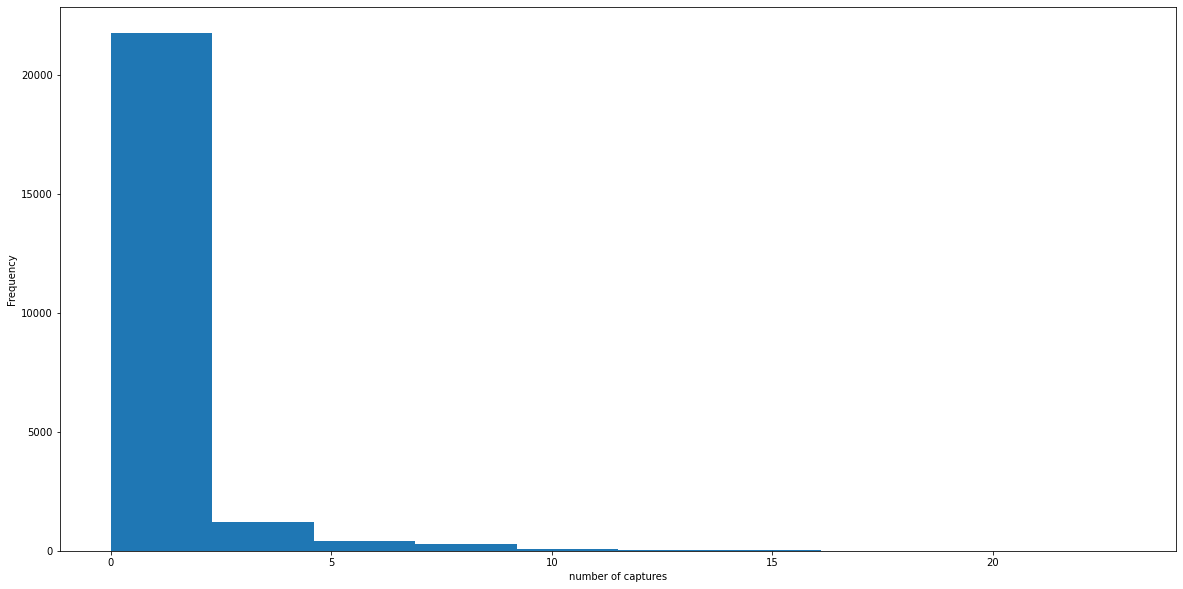

In [142]:
ax = df_date['Capture_Number'].plot(kind='hist')
plt.xlabel('number of captures')

In [143]:
df_date.corr()['Capture_Number'].sort_values(ascending=False)

Capture_Number        1.000000
year_woy              0.201067
year                  0.199772
day_of_year           0.047706
month                 0.047695
week_of_year          0.044185
day_of_month         -0.000129
day_of_week_caught   -0.010001
Name: Capture_Number, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Capture_Number'>

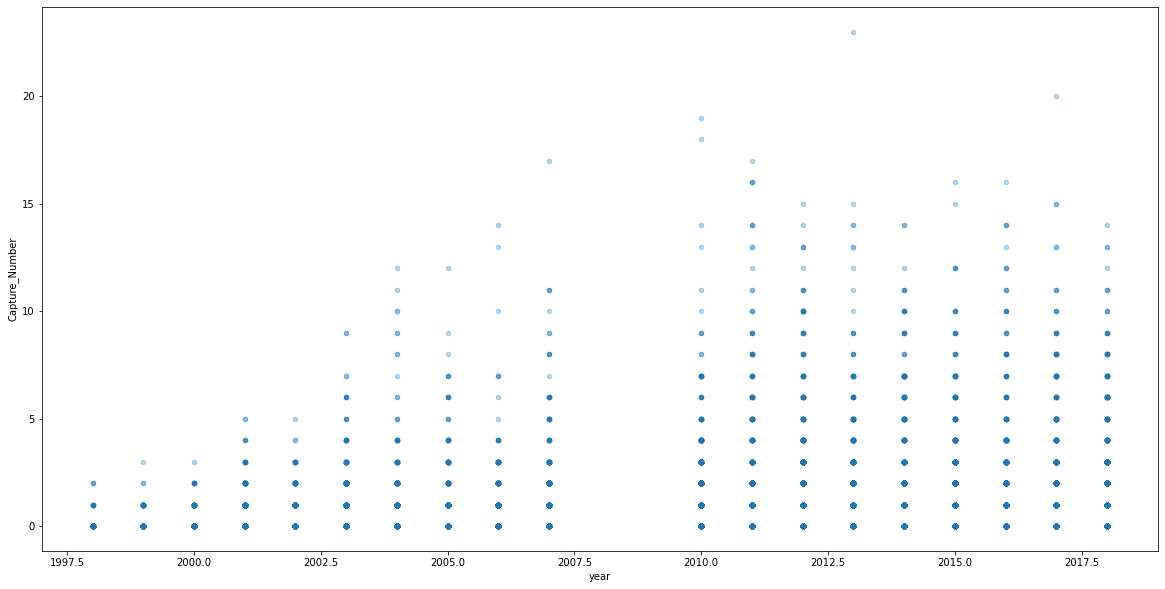

In [144]:
df_date.plot(x='year', y='Capture_Number', kind='scatter', alpha=0.3)

In [145]:
in_cols = df_date.drop(['Capture_Number','Date_TimeCaught', 'CaptureSite'], axis=1).columns
in_cols

Index(['CaptureSiteCategory', 'Type', 'year', 'week_of_year', 'year_woy',
       'day_of_year', 'month', 'day_of_week_caught', 'day_of_month',
       'CaptureSite_id'],
      dtype='object')

In [146]:
ycol = 'Capture_Number'

In [147]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df_date[in_cols], df_date[ycol])

LinearRegression()

In [148]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:", sqrt(mean_squared_error(df_date[ycol], lm.predict(df_date[in_cols]))))

RMSE: 1.5041142656554052


In [149]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
rf = RandomForestRegressor(n_estimators=100) # My go-to quick model for regression tasks.
rf.fit(df_date[in_cols], df_date[ycol])

RandomForestRegressor()

In [151]:
print("RMSE:", sqrt(mean_squared_error(df_date[ycol], rf.predict(df_date[in_cols]))))

RMSE: 0.4627150729742156


In [152]:
from sklearn.model_selection import KFold

# Demonstrating splits
kf = KFold(n_splits=10, shuffle=False)
for train, test in kf.split(df_date):
    print(df_date.iloc[train].shape, df_date.iloc[test].shape)

(21354, 13) (2373, 13)
(21354, 13) (2373, 13)
(21354, 13) (2373, 13)
(21354, 13) (2373, 13)
(21354, 13) (2373, 13)
(21354, 13) (2373, 13)
(21354, 13) (2373, 13)
(21355, 13) (2372, 13)
(21355, 13) (2372, 13)
(21355, 13) (2372, 13)


In [153]:
kf = KFold(n_splits=10, shuffle=True)

scores = []
for train, test in kf.split(df_date):
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(df_date[in_cols].iloc[train], df_date[ycol].iloc[train])
    rmse = sqrt(mean_squared_error(df_date[ycol].iloc[test], rf.predict(df_date[in_cols].iloc[test])))
    scores.append(rmse)
    print(rmse)

print("Average score in 10-fold CV:", np.mean(scores))

1.1806549283511527
1.2920335340778222
1.2914584052433367
1.3371846348118523
1.2726826440695271
1.2631011375878858
1.2000990793483863
1.185337469112897
1.1804718666674165
1.1868040074536006
Average score in 10-fold CV: 1.2389827706723877


In [154]:
for md in [5, 6, 8, 9, 10]:
    scores = []
    for train, test in kf.split(df_date):
        rf = RandomForestRegressor(n_estimators=100, max_depth=md)
        rf.fit(df_date[in_cols].iloc[train], df_date[ycol].iloc[train])
        rmse = sqrt(mean_squared_error(df_date[ycol].iloc[test], rf.predict(df_date[in_cols].iloc[test])))
        scores.append(rmse)
    print("Average score in 10-fold CV:", np.mean(scores), "for max depth:", md)

Average score in 10-fold CV: 1.311560770773338 for max depth: 5
Average score in 10-fold CV: 1.2393844058584897 for max depth: 6
Average score in 10-fold CV: 1.2008933215570905 for max depth: 8
Average score in 10-fold CV: 1.1904744860958956 for max depth: 9
Average score in 10-fold CV: 1.186404700566754 for max depth: 10


In [155]:
rf = RandomForestRegressor(n_estimators=100, max_depth=8)
rf.fit(df_date[in_cols], df_date[ycol])

RandomForestRegressor(max_depth=8)

In [156]:
df_sub['Capture_Number'] = rf.predict(df_sub[in_cols])

In [157]:
df_sub['ID'] = df_sub["CaptureSite"]+ "_" + df_sub["year_woy"].map(str)

In [158]:
df_sub[['ID', 'Capture_Number']].to_csv('submission.csv', index=False)